In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

# merge 12 month data

In [12]:
path = '/Users/lamvu/Music/Financial_Statement/data/'
filepaths = []# save data from temp variable
for file in os.listdir(path):#put name file of 12 month into file 
    if file.endswith('.csv'):#only put file have endswith = .csv
        filepath = path + file
        temp = pd.read_csv(filepath)
        filepaths.append(temp)
        result = pd.concat(filepaths)
df = result
df.to_csv('annualSales2019.csv',index=False)#move all data from 12 to new file

        

In [2]:
df = pd.read_csv('annualSales2019.csv')
df.head

<bound method NDFrame.head of        Order ID                   Product Quantity Ordered Price Each  \
0        141234                    iPhone                1        700   
1        141235  Lightning Charging Cable                1      14.95   
2        141236          Wired Headphones                2      11.99   
3        141237          27in FHD Monitor                1     149.99   
4        141238          Wired Headphones                1      11.99   
...         ...                       ...              ...        ...   
186845   259353    AAA Batteries (4-pack)                3       2.99   
186846   259354                    iPhone                1        700   
186847   259355                    iPhone                1        700   
186848   259356    34in Ultrawide Monitor                1     379.99   
186849   259357      USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       01/22/19 21:25     

### ADD NEW COLUMN MONTH FOR TABLE 

In [3]:
df['Month']=df['Order Date'].str.slice(stop=2)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [4]:
print(set(df['Month']))#have nan and or in data, get rid of nan and or value

{'02', '10', '03', 'Or', '05', '09', '01', nan, '12', '06', '08', '11', '07', '04'}


In [5]:
df=df.dropna(how='all')#remove nan

In [6]:
df[df['Month']== 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [7]:
df = df[ df['Month']!='Or']

In [8]:
print(set(df['Month']))

{'02', '10', '03', '05', '09', '01', '12', '06', '08', '11', '07', '04'}


### what was the best month for sales

In [9]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'],downcast = 'float')

In [10]:
df['Sale']=df['Quantity Ordered']*df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000
186846,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000
186847,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000
186848,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990


In [11]:
#move sale nearby order date
moving_column = df.pop('Sale')# cut the column out of table
df.insert(4,'Sale',moving_column)# add column sale from moving_column
df

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [12]:
sale_month_value = df.groupby('Month').sum(['Sale'])
sale_month_value

,Quantity Ordered,Price Each,Sale
Month,,,
01,10903,1811768.375,1822256.75
02,13449,2188884.750,2202022.50
03,17005,2791207.750,2807100.25
04,20558,3367671.000,3390670.25
05,18667,3135125.000,3152606.75
06,15253,2562025.500,2577802.25
07,16072,2632539.500,2647775.75
08,13448,2230345.500,2244467.75
09,13109,2084992.125,2097560.00


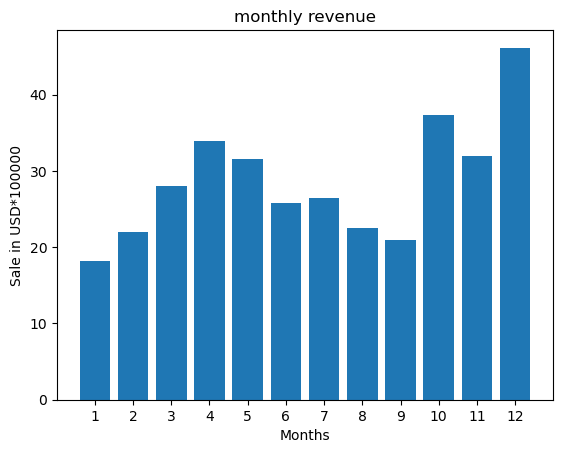

In [27]:
months = range(1,13)
plt.bar( x = months, height =sale_month_value['Sale']/100000 );
plt.xticks(months);
plt.xlabel('Months')
plt.ylabel('Sale in USD*100000')
plt.title('monthly revenue')
plt.show()


### what city has the best sales???

In [28]:
 df


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [29]:
split_city = lambda address:address.split(',')[1]

In [30]:
df['City'] = df['Purchase Address'].apply(split_city)
df

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles
186846,259354,iPhone,1,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco
186847,259355,iPhone,1,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,San Francisco


C:\Users\lamvu\AppData\Local\Temp\ipykernel_16308\2670932039.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_revenue = df.groupby('City').sum()['Sale']


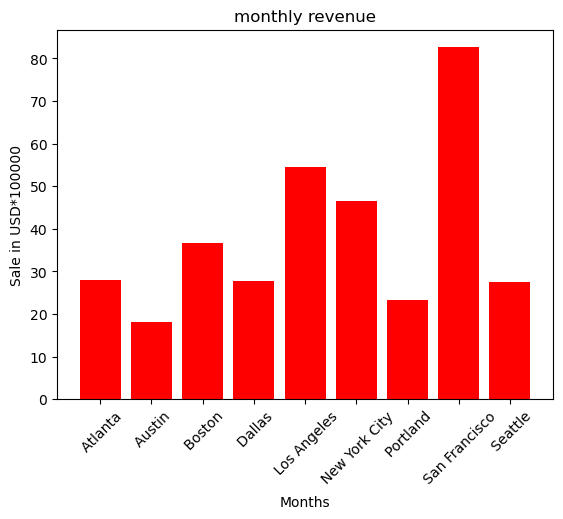

In [73]:
city_revenue = df.groupby('City').sum()['Sale']


cities = []
for city, sales in city_revenue.items():
    cities.append(city)


plt.bar( x = cities, height =city_revenue/100000, color = 'red' );
plt.xticks(tmp_city, rotation = 45);
plt.xlabel('Months')
plt.ylabel('Sale in USD*100000')
plt.title('monthly revenue')
plt.show()


### what time should we display ads to maximize the likelihood of customer's buying product

In [75]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [79]:
print(df['Order Date'].dtypes)

datetime64[ns]


In [78]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

20

In [82]:
df['Hours'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles,20
186846,259354,iPhone,1,700.000000,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco,16
186847,259355,iPhone,1,700.000000,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco,17


C:\Users\lamvu\AppData\Local\Temp\ipykernel_16308\541879667.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_value_hours = df.groupby('Hours').sum()['Sale']


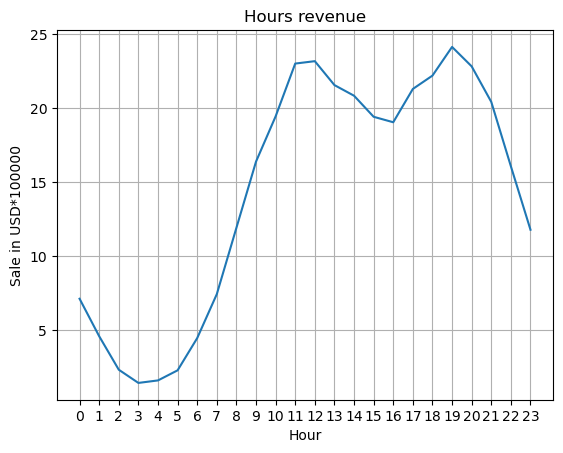

In [98]:
sale_value_hours = df.groupby('Hours').sum()['Sale']

arr_hours= []
for hours, sales in sale_value_hours.items():
    arr_hours.append(hours)
    
plt.plot(  arr_hours, sale_value_hours/100000);
plt.grid()
plt.xticks(arr_hours);
plt.xlabel('Hour')
plt.ylabel('Sale in USD*100000')
plt.title('Hours revenue')
plt.show()

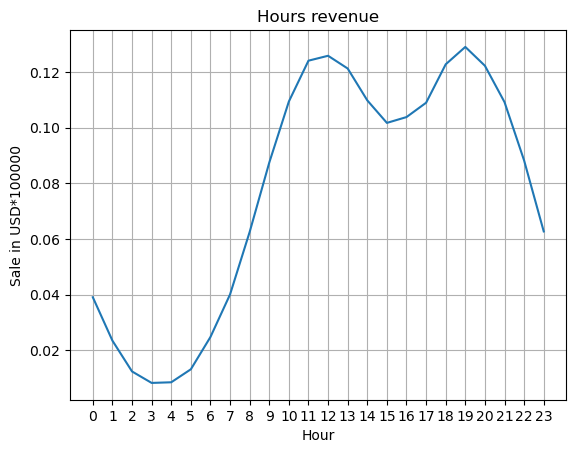

In [99]:
sale_value_hours = df.groupby('Hours').count()['Sale']

arr_hours= []
for hours, sales in sale_value_hours.items():
    arr_hours.append(hours)
    
plt.plot(  arr_hours, sale_value_hours/100000);
plt.grid()
plt.xticks(arr_hours);
plt.xlabel('Hour')
plt.ylabel('Sale in USD*100000')
plt.title('Hours revenue')
plt.show()

### what products are most often sold together ???